<a href="https://colab.research.google.com/github/Taweilo/Sales_Prediction_from_Media_Spend/blob/main/Sales_Prediction_from_Media_Spend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Prediction from Media Spend

 <img src="https://ewm.swiss/application/files/3916/6365/7200/The_Future_of_Marketing_EWM_SA_Digital_Agency_Geneva.jpg" width="1100" height="450">

## 1. Business Understanding

### Importing all the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, normalize
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor


### Ignore Warning

In [ ]:
import warnings
warnings.simplefilter("ignore")

## 2. Data Understanding

### 2.1 Loading the data
Sales & Media Spend Data: https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data

In [ ]:
# read csv files
df=pd.read_csv('Dummy Data HSS.csv')
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


### 2.2 Feature Description

| Name | Modeling Role | Measurement Level| Description|
| ---- | ------------- | ---------------- | ---------- |
| **TV** | input | float | TV promotion budget (in million) |
| **Radio** | input | float | Radio promotion budget (in million) |
| **Social Media** | input | float | Social Media promotion budget (in million) |
| **Influencer** | input | float | Type of Influencers |
| **Sales** | target | float | Sales in million |

In [ ]:
#check dimension
df.shape

(4572, 5)

In [ ]:
# check data type and missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [ ]:
null_counts = df.isnull().sum()
null_counts

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [ ]:
unique_values = df['Influencer'].unique()
print(unique_values)

['Mega' 'Micro' 'Nano' 'Macro']


In [ ]:
# Descriptive analysis
df.describe().round(1)

,TV,Radio,Social Media,Sales
count,4562.0,4568.0,4566.0,4566.0
mean,54.1,18.2,3.3,192.5
std,26.1,9.7,2.2,93.1
min,10.0,0.0,0.0,31.2
25%,32.0,10.5,1.5,112.3
50%,53.0,17.9,3.1,189.2
75%,77.0,25.6,4.8,272.5
max,100.0,48.9,14.0,364.1


In [ ]:
corr = df.corr()
corr

,TV,Radio,Social Media,Sales
TV,1.000000,0.869460,0.528168,0.999497
Radio,0.869460,1.000000,0.607452,0.869105
Social Media,0.528168,0.607452,1.000000,0.528906
Sales,0.999497,0.869105,0.528906,1.000000


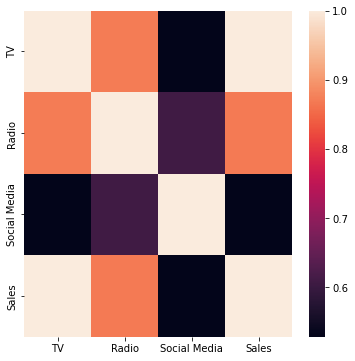

In [ ]:
plt.figure(figsize=(6, 6))
_ = sns.heatmap(corr,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)

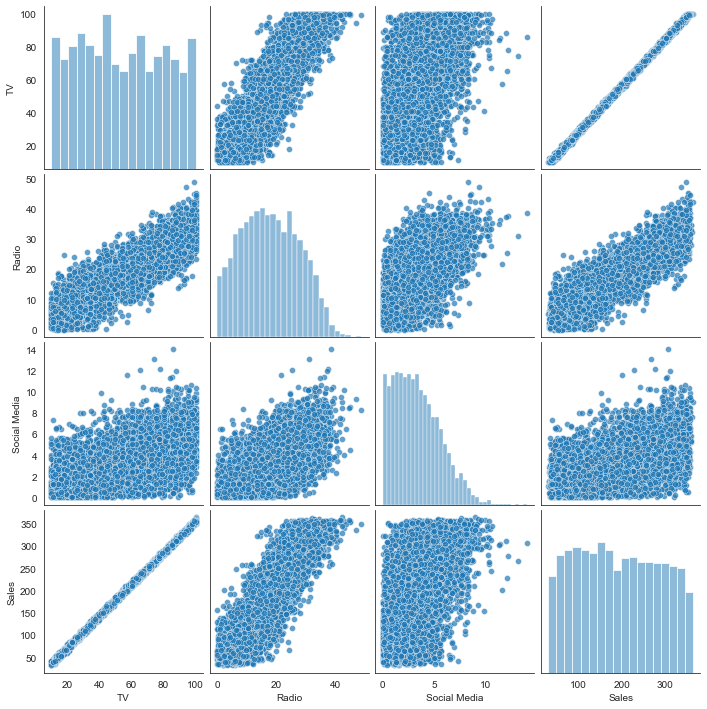

In [ ]:
# Select the columns for the pair plot
columns_to_plot = ['TV', 'Radio', 'Social Media', 'Sales']

# Set the plotting style to "white"
sns.set_style("white")

# Create the pair plot with no grid
sns.pairplot(df[columns_to_plot], palette="bright", diag_kws={'alpha': 0.5}, plot_kws={'alpha': 0.7})

# Show the plot
plt.show()

In [ ]:
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


## 3. Data Preparation
### 3.1 Remove the null

In [ ]:
# Remove all rows with null values
df= df.dropna()

### 3.2 Define variables

In [ ]:
# Create X, Y
y = df['Sales'] # define Y
X = df.drop(['Sales', 'Influencer'], axis=1) # define X by dropping irrelevent features
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,TV,Radio,Social Media
0,16.0,6.566231,2.907983
1,13.0,9.237765,2.409567
2,41.0,15.886446,2.913410
3,83.0,30.020028,6.922304
4,15.0,8.437408,1.405998


### 3.2 Split the data for train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state = 42) # split data 60% for training

## 4. Modeling
### 4.1 Linear Regression

In [ ]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)

In [ ]:
print(pd.Series(linear_regressor.coef_.flatten(), index=X_train.columns))

TV              3.562888
Radio           0.006592
Social Media   -0.042135
dtype: float64


In [ ]:
mse_lr = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse_lr}")

MSE is 8.738


### 4.2 LASSO CV

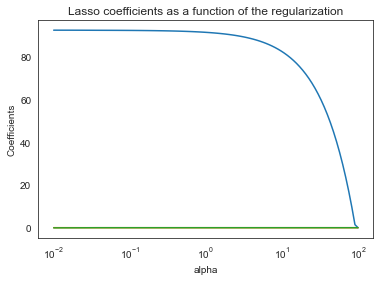

In [ ]:
alphas = 10**np.linspace(-2,5,100)

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a, max_iter=10000) # increase iterations for optimization of coefficients
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
# plt.legend(list(X_train.columns), loc='best')

plt.title('Lasso coefficients as a function of the regularization');

In [ ]:
# find the best alpha via CV with selected scoring metric
lassocv = LassoCV(alphas=alphas, cv=5, max_iter=10000) # CV= 5 folds
lassocv.fit(scale(X_train), y_train)

print('The best alpha from LassoCV:', lassocv.alpha_)

The best alpha from LassoCV: 0.03678379771828634


In [ ]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(lasso.coef_.flatten(), index=X_train.columns))

The coefficients are:
TV              92.505651
Radio            0.000000
Social Media    -0.000221
dtype: float64


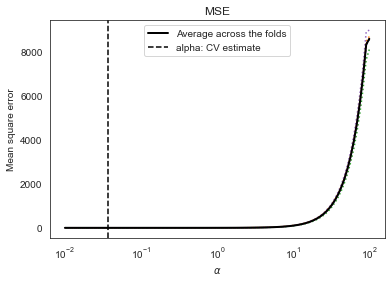

In [ ]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, linestyle=":")
plt.plot(
    lassocv.alphas_,
    lassocv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lassocv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")


plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
plt.title("MSE")
plt.show()

In [ ]:
y_pred=lasso.predict(scale(X_test.values))
mse_lasso = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse_lasso}")

MSE is 13.443


### 4.3 Ridge CV

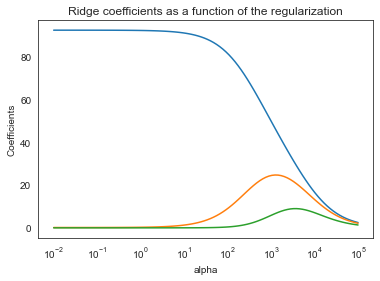

In [ ]:
alphas = 10**np.linspace(-2,5,100)

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_train), y_train)
    coefs.append(ridge.coef_)

fig, ax1 = plt.subplots(figsize=(6, 4))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')


plt.title('Ridge coefficients as a function of the regularization');

In [ ]:
# standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

In [ ]:
# set a large alpha to get smaller coefficients
ridge = Ridge(alpha=1000)
ridge.fit(scaler.transform(X_train), y_train)

print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
TV              49.953199
Radio           24.432269
Social Media     5.754477
dtype: float64


In [ ]:
# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error') # cv= 5 folds
ridgecv.fit(scale(X_train), y_train)
print('The best alpha from RidgeCV:', ridgecv.alpha_)

The best alpha from RidgeCV: 0.05994842503189409


In [ ]:
# with the best alpha
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
TV              92.529012
Radio            0.070602
Social Media    -0.092828
dtype: float64


In [ ]:
y_pred=ridge.predict(scale(X_test.values))
mse_ridge = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse_ridge}")

MSE is 13.39


### 4.4 Elastic net

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

ENcv = ElasticNetCV(alphas=None, cv=5, max_iter=10000) # default l1_ratio=0.5
ENcv.fit(scale(X_train), y_train)

print('The best alpha from ElasticNetCV:', ENcv.alpha_)

The best alpha from ElasticNetCV: 0.18508468445258067


In [ ]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)


EN=ElasticNet()
EN.set_params(alpha=ENcv.alpha_)
EN.fit(scale(X_train), y_train)

print('The coefficients are:')
print(pd.Series(EN.coef_.flatten(), index=X_train.columns))

The coefficients are:
TV              71.175738
Radio           16.121227
Social Media     1.333569
dtype: float64


In [ ]:
y_pred = EN.predict(scale(X_test.values))
mse_EN = round(mean_squared_error(y_test, y_pred), 3)
print(f"Test MSE for ElasticNet is {mse_EN}")

Test MSE for ElasticNet is 140.915


### 4.5 KNN

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
mse_train = [-1]*50
mse_test = [-1]*50
for K in range(50):
    model = neighbors.KNeighborsRegressor(n_neighbors = K+1)
    model.fit(X_train, y_train)  #fit the model
    mse_train[K] = mean_squared_error(y_train, model.predict(X_train))
    mse_test[K] = mean_squared_error(y_test, model.predict(X_test))


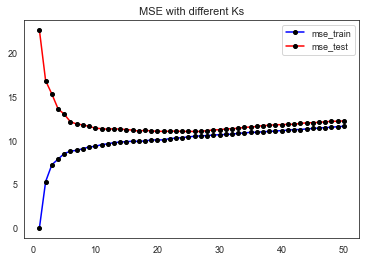

In [ ]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(6, 4))
plt.plot(np.arange(50)+1, mse_train,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'mse_train')
plt.plot(np.arange(50)+1, mse_test,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'mse_test')
plt.legend(fontsize=9)
plt.title('MSE with different Ks', fontsize=11)
plt.tick_params(labelsize=9)
plt.show()

In [ ]:
# optimal k
np.argmin(mse_test)+1

26

In [ ]:
# optimal MSE
min(mse_test)

11.002678681964202

### KNN CV

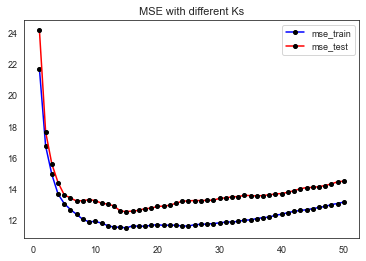

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

mse_train = []
mse_test = []
for K in range(1, 51):
    knn = KNeighborsRegressor(n_neighbors=K)
    scores_train = -cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    scores_test = -cross_val_score(knn, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
    mse_train.append(np.mean(scores_train))
    mse_test.append(np.mean(scores_test))

fig, ax1 = plt.subplots(figsize=(6, 4))
plt.plot(np.arange(50)+1, mse_train,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'mse_train')
plt.plot(np.arange(50)+1, mse_test,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'mse_test')
plt.legend(fontsize=9)
plt.title('MSE with different Ks', fontsize=11)
plt.tick_params(labelsize=9)
plt.show()

In [ ]:
# optimal k
np.argmin(mse_test)+1

15

In [ ]:
# optimal MSE
min(mse_test)

12.522713639256185

### 4.7 Decision Tree Regressor CV

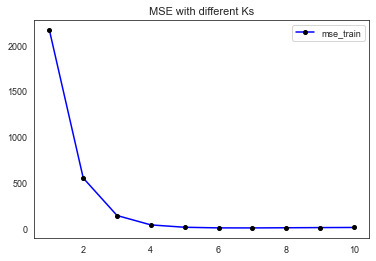

,max_depth,MSE
0,1,2163.004197
1,2,553.596090
2,3,145.315007
3,4,43.213356
4,5,17.392576
5,6,10.744243
6,7,10.364059
7,8,12.039462
8,9,13.886932
9,10,15.270876



The best model has max_depth=7 with a cross-validation MSE of 10.364059352899634.


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# create list to store the mse for each value of max_depth
mse_dtr = []

# fit regression tree and evaluate using cross-validation for max_depth from 1 to 10
for i in range(1, 11):
    dtc_i = DecisionTreeRegressor(max_depth=i, random_state=0)
    # perform 5-fold cross-validation and get the mean squared error
    cv_mse_dtr  = -cross_val_score(dtc_i, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    mse_dtr.append(cv_mse_dtr )
    #print(f"Cross-validation MSE of Regression Tree with max_depth={i}: {cv_mse}")

fig, ax1 = plt.subplots(figsize=(6, 4))
plt.plot(np.arange(10)+1, mse_dtr,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'mse_train')
plt.legend(fontsize=9)
plt.title('MSE with different Ks', fontsize=11)
plt.tick_params(labelsize=9)
plt.show()

df.dtr = pd.DataFrame({'max_depth': np.arange(10) + 1, 'MSE': mse_dtr})
display(df.dtr)  # Display the DataFrame using the display() function

# find the index of the model with the lowest MSE
best_model_idx = np.argmin(mse_dtr)
best_mse_dtr = mse_dtr[best_model_idx]
print(f"\nThe best model has max_depth={best_model_idx+1} with a cross-validation MSE of {best_mse_dtr}.")

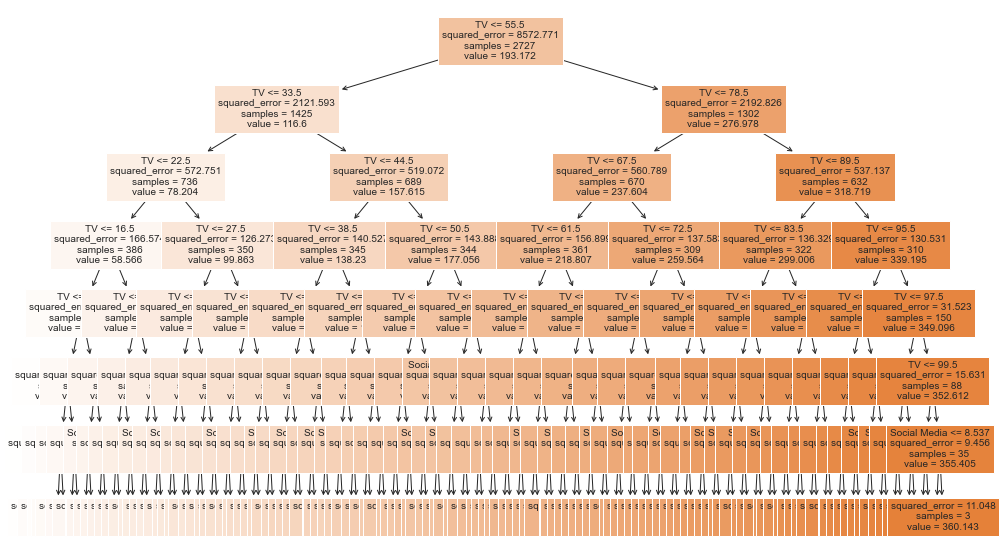

In [ ]:
from sklearn.tree import plot_tree
# Visualize regression tree
regr_tree =  DecisionTreeRegressor(max_depth=best_model_idx+1,random_state = 0)
model=regr_tree.fit(X_train,y_train)
fn = X_test.columns.values
cn = y_test.unique()
plt.figure(figsize = (16,10))
plot_tree(regr_tree, feature_names = fn, class_names = cn, filled = True, fontsize=10);

### 4.6 Bagging

In [ ]:
from sklearn.ensemble import BaggingRegressor
# default estimator is decision tree
# n_estimator: The number of base estimators in the ensemble.
regr_bag = BaggingRegressor(n_estimators=10, random_state=0).fit(scale(X_train), y_train)

In [ ]:
y_pred=regr_bag.predict(scale(X_test.values))
mse_bagging = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse_bagging }")

MSE is 17.964


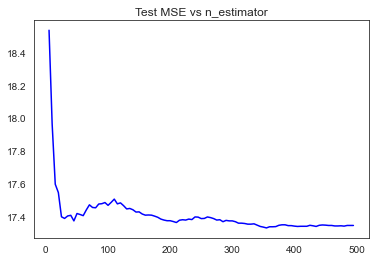

In [ ]:
mse_list_bagging = []
n_list = np.arange(5,500,5)
for n in n_list:
    regr_bag = BaggingRegressor(n_estimators=n,random_state=0).fit(scale(X_train), y_train)
    y_pred=regr_bag.predict(scale(X_test.values))
    mse_bagging = round(mean_squared_error(y_test, y_pred),3)
    mse_list_bagging.append(mse_bagging)

plt.plot(n_list, mse_list_bagging,  color = 'blue', markerfacecolor = 'black',label = 'Test MSE')
plt.title('Test MSE vs n_estimator')
plt.show()

### 4.7 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
regr_RF = RandomForestRegressor(n_estimators=10, random_state=0).fit(scale(X_train), y_train)

In [ ]:
y_pred=regr_RF.predict(scale(X_test.values))
mse_RF = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse_RF}")

MSE is 17.987


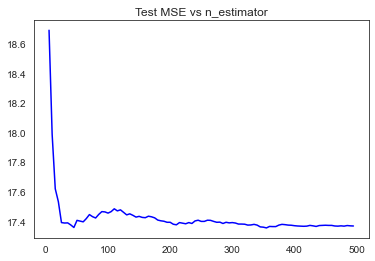

In [ ]:
mse_list_RF = []
n_list = np.arange(5,500,5)
for n in n_list:
    regr_RF = RandomForestRegressor(n_estimators=n,random_state=0).fit(scale(X_train), y_train)
    y_pred=regr_RF.predict(scale(X_test.values))
    mse_RF = round(mean_squared_error(y_test, y_pred),3)
    mse_list_RF.append(mse_RF)

plt.plot(n_list, mse_list_RF,  color = 'blue', markerfacecolor = 'black',label = 'Test MSE')
plt.title('Test MSE vs n_estimator')
plt.show()

#### Feature Importance

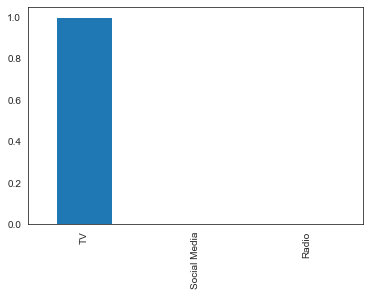

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(regr_RF.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt', 'log2',None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(scale(X_train), y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 1788,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': None,
 'max_depth': 70,
 'bootstrap': True}

In [ ]:
best_rd = rf_random.best_estimator_

In [ ]:
y_pred = best_rd.predict(scale(X_test.values))
mse_RF_cv = round(mean_squared_error(y_test, y_pred), 3)
print(f"MSE is {mse_RF_cv}")

MSE is 15.863


### 4.7 Gradient Decent

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

regr_GB = GradientBoostingRegressor(learning_rate=0.1, random_state=0).fit(scale(X_train), y_train)

In [ ]:
y_pred=regr_GB.predict(scale(X_test.values))
mse_GB = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse_GB}")

MSE is 15.308


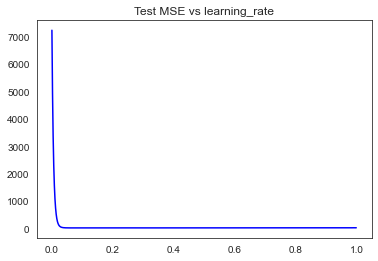

In [ ]:
mse_list_GB = []
rate_list = np.arange(0.001,1,0.001)
for rate in rate_list:
    regr_GB = GradientBoostingRegressor(learning_rate=rate, random_state=0).fit(scale(X_train), y_train)
    y_pred=regr_GB.predict(scale(X_test.values))
    mse_GB = round(mean_squared_error(y_test, y_pred),3)
    mse_list_GB.append(mse_GB)

plt.plot(rate_list, mse_list_GB,  color = 'blue', markerfacecolor = 'black',label = 'Test MSE')
plt.title('Test MSE vs learning_rate')
plt.show()

### 4.8 XGBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb

In [ ]:
regr_xgb=xgb.XGBRegressor(eval_metric='rmse')

param_grid = {"max_depth":    [1, 2 , 4, 5, 6, 8, 10],
              "n_estimators": [20, 50 ,100, 200, 500, 800, 1000],
              "learning_rate": [0.01,  0.015, 0.05 , 0.1]}

search = GridSearchCV(regr_xgb, param_grid, cv=5).fit(scale(X_train), y_train)

print("The best hyperparameters are ",search.best_params_)

In [ ]:
regr_xgb=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmse')

regr_xgb.fit(scale(X_train), y_train)

In [ ]:
y_pred=regr_xgb.predict(scale(X_test.values))
mse_xgb = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse_xgb}")

In [ ]:
feature_importances = pd.Series(regr_xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

## Neural Network

- https://www.ibm.com/topics/neural-networks

<img src="https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/3a/b8/ICLH_Diagram_Batch_01_03-DeepNeuralNetwork.component.simple-narrative-xl-retina.ts=1679336162077.png/content/adobe-cms/us/en/topics/neural-networks/jcr:content/root/table_of_contents/intro/simple_narrative/image" width="500">

- Explanation on Youtube: https://youtu.be/aircAruvnKk


In [ ]:
from tensorflow.keras.models import Sequential # put layers together
from tensorflow.keras.layers import Dense # define the layer

In [ ]:
# define the keras model
regr_nn = Sequential()
regr_nn.add(Dense(20, input_shape=(X_train.shape[1],), activation='relu'))
regr_nn.add(Dense(10, activation='relu'))
regr_nn.add(Dense(10, activation='relu'))
regr_nn.add(Dense(1, activation='linear')) # linear for regression; sigmoid/softmax for classification

In [ ]:
# compile the keras model
regr_nn.compile(loss='MeanSquaredError', optimizer='adam', metrics=['MeanSquaredError'])

In [ ]:
# fit the keras model on the dataset
regr_nn.fit(scale(X_train), y_train, epochs=100, batch_size=10)

In [ ]:
y_pred=regr_nn.predict(scale(X_test.values))
mse_nn = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse_nn}")

## 5. Evaluation

In [ ]:
# Define data
model_names = ['Linear Regression', 'Lasso CV', 'Ridge CV', 'Elastic Net CV',
               'KNN CV',' Decision Tree Regressor CV', 'Bagging', 'Random Forest CV', 'XG boost']
mse_values = [mse_lr, mse_lasso, mse_ridge, mse_EN,
              min(mse_test), best_mse_dtr, mse_bagging, mse_RF_cv, mse_xgb]
hyperparameters = [
    'N/A',
     f"\nalpha= {lassocv.alpha_}",
     f"\nalpha= {ridgecv.alpha_}",
     f"\nalpha= {ENcv.alpha_}",
     f"\nk=np.argmin(mse_test)+1}",
     f"\nmax_depth= {best_model_idx+1}",
     "n_estimators=10",
     rf_random.best_params_,
     search.best_params_
]


# Create table
df.evaluation = pd.DataFrame({
    'Model': model_names,
    'MSE': mse_values,
    'Hyperparameters': hyperparameters
})

# Print table
display(df.evaluation)

In [ ]:
#parameters= [
    'N/A',
    lassocv.alpha_,
    ridgecv.alpha_,
    ENcv.alpha_,
    min(mse_test),
]


In [ ]:
'Parameters': parameters